# 수치해석기법 실습 {.unnumbered}

In [2]:
import os
if os.getcwd()!='/Users/hwan/Desktop/Homepage/study_24fall/실습':
    os.chdir('실습')
os.getcwd()

'/Users/hwan/Desktop/Homepage/study_24fall/실습'

## Ch3. Linear system

### Equations

In [64]:
import numpy as np
from scipy.linalg import lu
from numpy.linalg import eig, cholesky, qr, svd
import time

# 예제 행렬 A와 벡터 b 정의
A = np.array([[1,2,3],[3,2,1],[5,1,1]], dtype=float)
b = np.array([12,10,8], dtype=float)

#
n = 5
A = np.random.randn(n, n)
b = np.random.randn(n)

In [65]:
###################################
# Forward / Backward Substitution
###################################
def forward(L, b):
    # 전방 대입 (Ly = Pb)
    y = np.zeros_like(b)
    y[0] = b[0]/L[0,0]
    for i in range(1,len(y)):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i,i]
    return y

def backward(U, y):
    # 후방 대입 (Ux = y)
    x = np.zeros_like(y)
    x[-1] = y[-1] / U[-1,-1]
    for i in range(len(x)-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

In [66]:
###################################
# LU Decomposition
###################################
# LU 분해 수행: A = P @ L @ U
t0 = time.time()
P, L, U = lu(A)
Pb = np.dot(P.T, b)
y = forward(L, Pb)
x = backward(U, y)
t1 = time.time()

In [67]:
# 결과 출력
print("Solution x from PLU decomposition:")
print(x)

print("\nSolution x from A inverse")
print(np.linalg.inv(A).dot(b))

Solution x from PLU decomposition:
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]

Solution x from A inverse
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]


In [68]:
###################################
#cholesky decomposition
###################################
#check whether A is positive definite
eigen_values, eigen_vectors = eig(A)
print(eigen_values)
#c = cholesky(A)  #error

[ 0.67444857+1.16816178j  0.67444857-1.16816178j  0.08484185+0.j
 -1.10418616+0.68605571j -1.10418616-0.68605571j]


In [69]:
B = A.T @ A
print("B = \n", B, '\n')

B = 
 [[ 6.75980329  2.42615302 -1.43962748  3.22213589 -1.98014089]
 [ 2.42615302  3.44204392 -0.39668661  1.96145718 -0.18451717]
 [-1.43962748 -0.39668661  2.02620681  0.20972367  2.79204537]
 [ 3.22213589  1.96145718  0.20972367  2.87802662  0.9190702 ]
 [-1.98014089 -0.18451717  2.79204537  0.9190702   4.31655632]] 



In [70]:
eigen_values, eigen_vectors = eig(B)
print("Eigen values = ", eigen_values)

Eigen values =  [1.07007907e+01 6.31151224e+00 2.00747918e+00 1.24979393e-03
 4.01605076e-01]


In [71]:
c = cholesky(B)  #A = c@c'
print(np.allclose(B, c@c.T), "\n")

True 



In [72]:
y = forward(c, b)
x = backward(c.T, y)
print("Solution x from Cholesky decomposition:")
print(x)

print("\nSolution x from A inverse")
print(np.linalg.inv(B).dot(b))

Solution x from Cholesky decomposition:
[ 255.85772214   52.2097322  -577.02114312 -469.10314857  592.88299097]

Solution x from A inverse
[ 255.85772214   52.2097322  -577.02114312 -469.10314857  592.88299097]


In [73]:
###################################
#QR decomposition
###################################
Q, R = qr(A)
print(np.allclose(A, Q@R))

True


In [74]:
x = backward(R, Q.T @ b)
print("Solution x from QR decomposition:")
print(x)

print("\nSolution x from A inverse")
print(np.linalg.inv(A).dot(b))

Solution x from QR decomposition:
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]

Solution x from A inverse
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]


In [75]:
###################################
#SVD decomposition
###################################
U, S, Vh = svd(A)
print(np.allclose(A, U @ np.diag(S) @ Vh))

True


In [76]:
x = Vh.T @ np.diag(1/S) @ U.T @ b
print("Solution x from SVD decomposition:")
print(x)

print("\nSolution x from A inverse")
print(np.linalg.inv(A).dot(b))

Solution x from SVD decomposition:
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]

Solution x from A inverse
[ 12.76083942   2.28155216 -26.85469595 -23.45033461  28.17326524]


### Equations - time

In [77]:
n = 1000
A = np.random.randn(n,n)
b = np.random.randn(n)

###################################
# LU Decomposition
###################################
# LU 분해 수행: A = P @ L @ U
t0 = time.time()
P, L, U = lu(A)
Pb = np.dot(P.T, b)
y = forward(L, Pb)
x = backward(U, y)
t1 = time.time()

# 결과 출력
print("\nSolution x from PLU decomposition:")
print("Time = ", t1-t0)

###################################
#cholesky decomposition
###################################
B = A.T @ A

t0 = time.time()
c = cholesky(B)  #A = c@c'
y = forward(c, b)
x = backward(c.T, y)
t1 = time.time()

print("\nSolution x from Cholesky decomposition:")
print("Time = ", t1-t0)

###################################
#QR decomposition
###################################
t0 = time.time()
Q, R = qr(A)
x = backward(R, Q.T @ b)
t1 = time.time()

print("\nSolution x from QR decomposition:")
print("Time = ", t1-t0)

###################################
#SVD decomposition
###################################
t0 = time.time()
U, S, Vh = svd(A)
x = Vh.T @ np.diag(1/S) @ U.T @ b
t1 = time.time()
print("\nSolution x from SVD decomposition:")
print("Time = ", t1-t0)

###################################
#A inverse
###################################
print("\nSolution x from A inverse")
t0 = time.time()
Ainv = np.linalg.inv(A)
x = Ainv.dot(b)
t1 = time.time()
print("Time = ", t1-t0)

###################################
# Numpy solution
###################################
print("\nSolution x from Numpy solution(np.linalg.solve)")
t0 = time.time()
x = np.linalg.solve(A,b)
t1 = time.time()
print("Time = ", t1-t0)


Solution x from PLU decomposition:
Time =  0.025469064712524414

Solution x from Cholesky decomposition:
Time =  0.13914179801940918

Solution x from QR decomposition:
Time =  1.0981662273406982

Solution x from SVD decomposition:
Time =  0.5532040596008301

Solution x from A inverse
Time =  0.02708721160888672

Solution x from Numpy solution(np.linalg.solve)
Time =  0.00940704345703125


### Linear system iterative

In [80]:
import numpy as np
import matplotlib.pyplot as plt 

# 예제 행렬 A와 벡터 b 정의
A = np.array([[1,2,3],[3,2,1],[5,1,1]], dtype=float)
A = A.T@A # 이거 안하면 발산
b = np.array([12,10,8], dtype=float)

print("Solution x from A inverse")
sol = np.linalg.inv(A).dot(b)
print(sol)

Solution x from A inverse
[-0.3125  2.875  -1.3125]


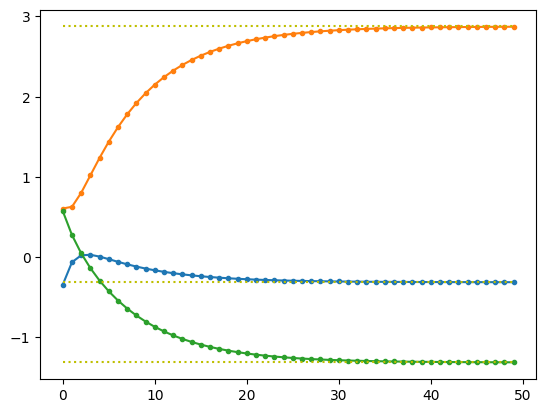

In [81]:
#Gauss-Seidel
n = len(b)
x = np.ones(n) #initial value
idx = np.arange(n)
iter = 50
xs = np.empty((iter,n))
for j in range(iter):
    for i in range(n):
        mask = idx!=i
        x[i] = (b[i] - (A[i,mask] * x[mask]).sum()) / A[i,i]
    xs[j,:] = x

plt.plot(xs,'.-')
for i in range(n):
    plt.plot(np.arange(iter), np.ones(iter)*sol[i], ":y")

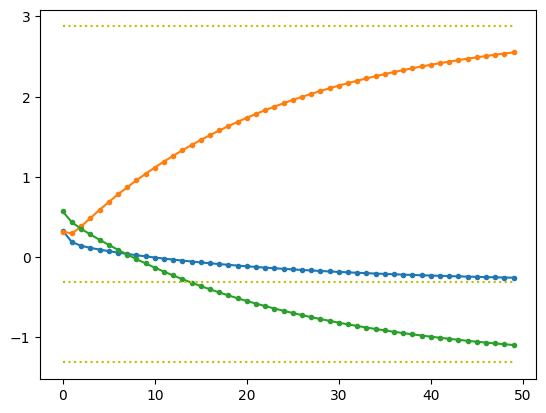

In [88]:
#SOR
omega = 0.5
n = len(b)
x = np.ones(n) #initial value
iter = 50
xs = np.empty((iter,n))
for j in range(iter):
    for i in range(n):
        x[i] = x[i] + omega * (b[i] - (A[i,:] * x).sum()) / A[i,i]
    xs[j,:] = x

plt.plot(xs,'.-')
for i in range(n):
    plt.plot(np.arange(iter), np.ones(iter)*sol[i], ":y")

## Ch4. Finite Difference Method

### 1 factor FDM

In [3]:
from FDM_blackscholes import bsprice
from FDM_fdm import fdm_vanilla_option, exfdm_vanilla_option
import numpy as np 
import time

s = 100
k = 100
r = 0.03
q = 0.01
t = 0.25
sigma = 0.2
optionType = 'put'

#Analytic Formula
t0 = time.time()
price = bsprice(s,k,r,q,t,sigma,optionType)
print(f"Analytic Price = {price:0.6f}")
print("computation time = ", time.time()-t0, "\n")

maxS, n, m = s*2, 1000, 10000
t0 = time.time()
v, ex_price = exfdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                   maxS, n, m)
print(f"EX-FDM Price = {ex_price:0.6f}")
print("computation time = ", time.time()-t0, "\n")

t0 = time.time()
v, ex_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                   maxS, n, m, 0)
print(f"EX-FDM Price = {ex_price:0.6f}")
print("computation time = ", time.time()-t0, "\n")

t0 = time.time()
v, im_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                   maxS, n, m)
print(f"IM-FDM Price = {im_price:0.6f}")
print("computation time = ", time.time()-t0, "\n")

t0 = time.time()
v, cn_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                   maxS, n, m, 0.5)
print(f"CN-FDM Price = {cn_price:0.6f}")
print("computation time = ", time.time()-t0, "\n")

Analytic Price = 3.724086
computation time =  0.000476837158203125 

EX-FDM Price = 3.723938
computation time =  0.09713983535766602 

EX-FDM Price = 3.723938
computation time =  0.6065318584442139 

IM-FDM Price = 3.723837
computation time =  0.5502662658691406 

CN-FDM Price = 3.723888
computation time =  0.542182207107544 



In [15]:
'''
Explicit FDM이 빠르고 좋아보이지만, 수치적 불안정성 문제가 있을 수 있어 안쓰는게 좋음
특히, 델타s<델타t인 경우, 발산할 가능성이 큼. 변동성이 커도 발산할 가능성이 큼.
정밀도는 s에 달려있어서 수렴성을 고려하면 잘 안써야하는게 맞음
'''
maxS, n, m = s*2, 1000, 9500
v, ex_price = exfdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                maxS, n, m)
print(f"EX-FDM Price = {ex_price:0.6f}")

v, ex_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                maxS, n, m, 0)
print(f"EX-FDM Price = {ex_price:0.6f}")

v, im_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                maxS, n, m)
print(f"IM-FDM Price = {im_price:0.6f}")

v, cn_price = fdm_vanilla_option(s, k, r, q, t, sigma, optionType, 
                                maxS, n, m, 0.5)
print(f"CN-FDM Price = {cn_price:0.6f}")

EX-FDM Price = -0.300684
EX-FDM Price = -0.300684
IM-FDM Price = 3.723835
CN-FDM Price = 3.723888
